In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [1]:
import os,sys,glob,shutil
from demcoreg import dem_mask
from pygeotools.lib import iolib,geolib,malib,warplib
from skysat_stereo import asp_utils as asp
import numpy as np
from imview import pltlib
import matplotlib.pyplot as plt
import pandas as pd 
import geopandas as gpd


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Case 1:
##### Accuracy Assement, full Lidar Pipeline (camera initiaion and pre-stereo mapprojection with 10 m DEM, Coregistration with 1m DEM)

### Absolute Accuracy

In [2]:
lidar_dir = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/'

In [40]:
skysat_alt_dem = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/georegistered_dem_mos_static_surface/now_rot_align/run-trans_source-DEM.tif'

In [4]:
difference_map_fn = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/aligned2lidar/run-trans_source-DEM_rainier_lidar_dsm_1m-adj_diff.tif'

In [3]:
lidar_dir = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/'
lidar_dem = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj.tif'

In [16]:
aligned_dem = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif'
#aligned_dem = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_alignment_paper_non_glac/run-trans_source-DEM.tif'
rpc_dem = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/init_rpc_stereo/composite_dems/aligned2lidar/run-trans_source-DEM.tif'
#aligned_dem = glob.glob(os.path.join(lidar_dir,'georegistered_dem_mos/run-trans_source-DEM.tif'))[0]
#aligned_dem = '/nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/aligned2lidar/run-trans_source-DEM.tif'
#aligned_dem = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/final_ht_dem_stereo/composite_dems/triplet_median_mos.tif'

In [18]:
ds_list = warplib.memwarp_multi_fn([aligned_dem,lidar_dem,rpc_dem],)


Warping all inputs to the following:
Resolution: 2.0
Extent: [583538.0, 5175797.0, 591053.0, 5199185.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/aligned2srtm_exposed_surface_trans_rot_max_disp40/run-trans_source-DEM.tif
nl: 11694 ns: 3758 res: 2.000
2 of 3: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/rainier_lidar_dsm_1m-adj.tif
nl: 11694 ns: 3758 res: 2.000
3 of 3: /nobackupp2/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/init_rpc_stereo/composite_dems/aligned2lidar/run-trans_source-DEM.tif
nl: 11694 ns: 3758 res: 2.000


In [19]:
skysat_dem_ma,lidar_dem_ma,rpc_dem_ma = [iolib.ds_getma(x) for x in ds_list]
difference_map_ma = skysat_dem_ma - lidar_dem_ma
difference_map_ma_rpc = rpc_dem_ma - lidar_dem_ma

In [20]:
#static_surface_mask = dem_mask.get_mask(ds_list[0],mask_list=['glaciers','nlcd'],dem_fn=lidar_dem)
static_surface_mask = dem_mask.get_mask(ds_list[0],mask_list=['glaciers','nlcd'],dem_fn=aligned_dem)

Masking glaciers
Found glacier shp: /nobackup/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 

Warping all inputs to the following:
Resolution: 2.0
Extent: [583538.0, 5175797.0, 591054.0, 5199185.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: near

1 of 1: /nobackup/sbhusha1/reference_data/NLCD_2016_Land_Cover_L48_20190424.tif
nl: 11694 ns: 3758 res: 2.000
Loading NLCD LULC
Filtering NLCD LULC with: not_forest
Generating final mask to use for reference surfaces, and applying to input DEM


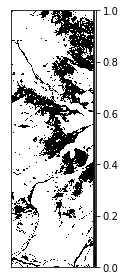

In [21]:
f,ax = plt.subplots()
pltlib.iv(static_surface_mask,cmap='gray',ax=ax)

static surfaces are black (0), moving surfaces are white (1), as per numpy convention, that means that static surfaces are unmasked :) . Although, I must say, we can do a way better job at this using classification in the original ortho image itself in the futures :) 

In [22]:
#lidar_ma,skysat_ma = [iolib.ds_getma(x) for x in ds_list]
#dem_diff = skysat_ma - lidar_ma
dem_diff_static = np.ma.array(difference_map_ma,mask=static_surface_mask)
dem_diff_static_rpc = np.ma.array(difference_map_ma_rpc,mask=static_surface_mask)

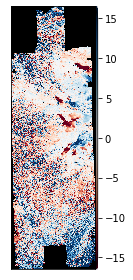

In [10]:
f,ax = plt.subplots()
pltlib.iv(difference_map_ma,ax=ax,cmap='RdBu',clim=(-15,15))

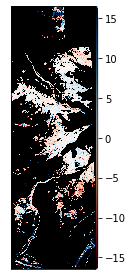

In [11]:
f,ax = plt.subplots()
pltlib.iv(dem_diff_static,ax=ax,cmap='RdBu',clim=(-15,15))

In [25]:
ice_mask = dem_mask.get_icemask(ds_list[0])

Masking glaciers
Found glacier shp: /nobackup/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 


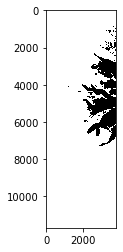

In [26]:
f,ax = plt.subplots()
ax.imshow(ice_mask,cmap='gray')

In [27]:
non_ice_dh_stats = np.ma.array(difference_map_ma,mask=~ice_mask)
non_ice_dh_stats_rpc = np.ma.array(difference_map_ma_rpc,mask=~ice_mask)

<IPython.core.display.Javascript object>


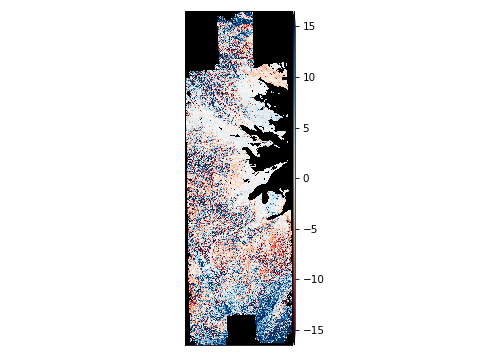

In [126]:
f,ax = plt.subplots()
pltlib.iv(non_ice_dh_stats,cmap='RdBu',clim=(-15,15),ax=ax)

In [127]:
malib.get_stats_dict(difference_map_ma)

{'count': 35149495,
 'min': -138.4266357421875,
 'max': 184.0150146484375,
 'ptp': 322.441650390625,
 'mean': 2.0766484621211196,
 'std': 9.543832304938975,
 'nmad': 5.703177795410156,
 'med': 0.5584716796875,
 'median': 0.5584716796875,
 'p16': -4.8856201171875,
 'p84': 9.4140625,
 'spread': 7.14984130859375,
 'mode': 0.359619140625}

In [29]:
malib.get_stats_dict(non_ice_dh_stats)

{'count': 31489158,
 'min': -142.75701904296875,
 'max': 185.4053955078125,
 'ptp': 328.16241455078125,
 'mean': 2.1851827511543225,
 'std': 9.732610203613909,
 'nmad': 5.8478724609374995,
 'med': 0.426513671875,
 'median': 0.426513671875,
 'p16': -5.04095458984375,
 'p84': 9.8682861328125,
 'spread': 7.454620361328125,
 'mode': 0.4892578125}

In [30]:
malib.get_stats_dict(non_ice_dh_stats_rpc)

{'count': 31221612,
 'min': -606.3233642578125,
 'max': 141.482177734375,
 'ptp': 747.8055419921875,
 'mean': -4.300611928243024,
 'std': 11.347287187403092,
 'nmad': 9.330136450195312,
 'med': -3.6424560546875,
 'median': -3.6424560546875,
 'p16': -14.4761962890625,
 'p84': 4.985595703125,
 'spread': 9.73089599609375,
 'mode': -0.185302734375}

In [16]:
malib.calcperc(non_ice_dh_stats,(5,95))

(-10.853271484375, 20.421142578125)

In [23]:
malib.get_stats_dict(dem_diff_static)

{'count': 9060699,
 'min': -98.8426513671875,
 'max': 155.5601806640625,
 'ptp': 254.40283203125,
 'mean': 0.7300076946145574,
 'std': 6.267480391258407,
 'nmad': 2.4890378173828123,
 'med': 0.115966796875,
 'median': 0.115966796875,
 'p16': -2.7537841796875,
 'p84': 2.868896484375,
 'spread': 2.81134033203125,
 'mode': 0.4892578125}

In [141]:
lidar_diff_static_stats = malib.get_stats_dict(dem_diff_static)
lidar_diff_static_stats_rpc = malib.get_stats_dict(dem_diff_static_rpc)

In [23]:
lidar_static.count()

11274111

In [131]:
lidar_diff_static_stats

{'count': 9060421,
 'min': -98.1888427734375,
 'max': 158.3026123046875,
 'ptp': 256.491455078125,
 'mean': 0.6609003534880322,
 'std': 6.189718574312723,
 'nmad': 2.4723875244140623,
 'med': 0.14404296875,
 'median': 0.14404296875,
 'p16': -2.823974609375,
 'p84': 2.8023681640625,
 'spread': 2.81317138671875,
 'mode': 0.359619140625}

In [132]:
malib.calcperc(dem_diff_static,(5,95))

(-6.433349609375, 11.21221923828125)

<IPython.core.display.Javascript object>


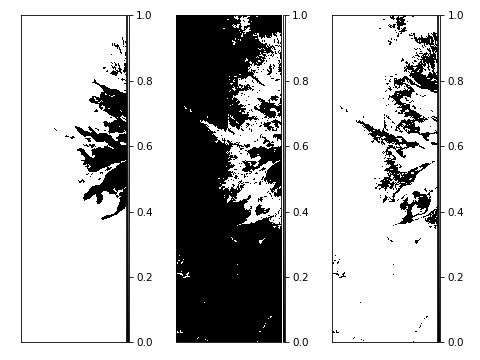

Masking glaciers
Found glacier shp: /nobackup/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 

Warping all inputs to the following:
Resolution: 2.0
Extent: [583533.0, 5175797.0, 591053.0, 5199185.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: near

1 of 1: /nobackup/sbhusha1/reference_data/NLCD_2016_Land_Cover_L48_20190424.tif
nl: 11694 ns: 3760 res: 2.000
Loading NLCD LULC
Filtering NLCD LULC with: rock


In [27]:
def get_nlcd(dem_ds,filter='rock'):
    rs = 'near'
    nlcd_ds = iolib.fn_getds(dem_mask.get_nlcd_fn())
    nlcd_ds_warp = warplib.memwarp_multi([nlcd_ds,], res=dem_ds, extent=dem_ds, t_srs=dem_ds, r=rs)[0]
    nlcd_mask = dem_mask.get_nlcd_mask(nlcd_ds_warp,filter=filter)
    return nlcd_mask
f,ax = plt.subplots(1,3)
ice_mask = dem_mask.get_icemask(difference_map_ds)
pltlib.iv(ice_mask,ax=ax[0],cmap='gray')
rock_mask = get_nlcd(difference_map_ds)
pltlib.iv(rock_mask,ax=ax[1],cmap='gray')
pltlib.iv(~np.logical_and(ice_mask,rock_mask),ax=ax[2],cmap='gray')
#vegetated_mask = ~np.logical_and(ice_mask,not_forest_mask)
rock_ice_mask = ~np.logical_and(ice_mask,rock_mask)

<IPython.core.display.Javascript object>


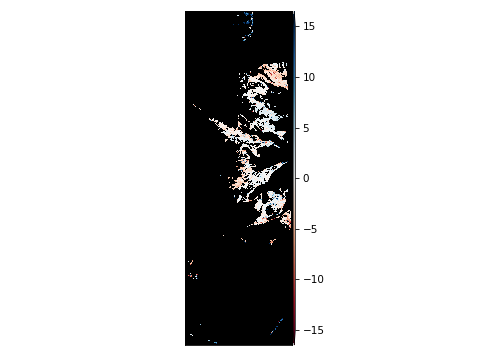

In [28]:
f,ax = plt.subplots()
pltlib.iv(np.ma.array(difference_map_ma,mask=rock_ice_mask),cmap='RdBu',ax=ax,clim=(-15,15))

In [30]:
malib.get_stats_dict(np.ma.array(difference_map_ma,mask=rock_ice_mask))


{'count': 4055271,
 'min': -99.2088623046875,
 'max': 147.4002685546875,
 'ptp': 246.609130859375,
 'mean': -0.004723850007400091,
 'std': 4.802122827753604,
 'nmad': 2.1089767822265624,
 'med': -0.328857421875,
 'median': -0.328857421875,
 'p16': -2.813232421875,
 'p84': 1.64208984375,
 'spread': 2.2276611328125,
 'mode': 0.096435546875}

In [31]:
malib.calcperc(np.ma.array(difference_map_ma,mask=rock_ice_mask),(5,95))

(-4.9130859375, 5.905029296875)

### c_mask = malib.common_mask([dem_diff_static,lidar_static])

There is some residual hight offset over the streams on the South Eastern side of the collection.

# How does the elevation difference varies vs slope

In [159]:
lidar_slope_ma = geolib.gdaldem_mem_ds(ds_list[0],'slope',returnma=True)
lidar_slope_static = np.ma.array(lidar_slope_ma,mask=static_surface_mask)
cmask_slope = malib.common_mask([lidar_slope_static,dem_diff_static])

<IPython.core.display.Javascript object>


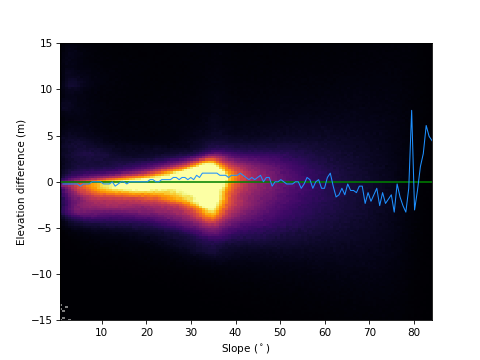

Text(0, 0.5, 'Elevation difference (m)')

In [60]:
f,ax = plt.subplots()
ax.axhline(y=0,c='g')
pltlib.plot_2dhist(ax,np.ma.compressed(np.ma.array(lidar_slope_static,mask=cmask_slope)),
                   np.ma.compressed(np.ma.array(dem_diff_static,mask=cmask_slope)),
                  ylim=(-15,15))
ax.set_xlabel("Slope ($^\circ$)")
ax.set_ylabel("Elevation difference (m)")



<IPython.core.display.Javascript object>


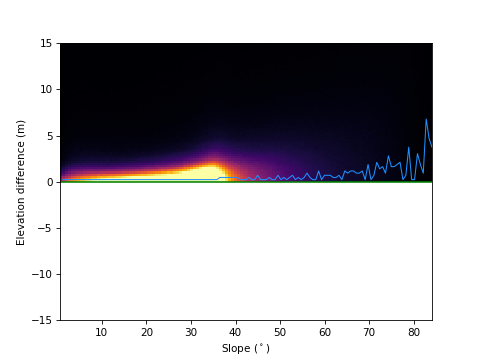

Text(0, 0.5, 'Elevation difference (m)')

In [25]:
f,ax = plt.subplots()
ax.axhline(y=0,c='g')
pltlib.plot_2dhist(ax,np.ma.compressed(np.ma.array(lidar_slope_static,mask=cmask_slope)),
                   np.ma.compressed(np.abs(np.ma.array(dem_diff_static,mask=cmask_slope))),
                  ylim=(-15,15))
ax.set_xlabel("Slope ($^\circ$)")
ax.set_ylabel("Elevation difference (m)")



### Relative Accuracy

In [32]:
nmad_pre_fn  = os.path.join(lidar_dir,'init_rpc_stereo/composite_dems/triplet_nmad_mos.tif')
nmad_post_fn = os.path.join(lidar_dir,'final_pinhole_stereo/composite_dems/triplet_nmad_mos.tif')
#nmad_post_fn = '/nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/final_ht_dem_stereo/composite_dems/triplet_nmad_mos.tif'
count_post_fn = os.path.join(lidar_dir,'final_pinhole_stereo/composite_dems/triplet_count_mos.tif')
median_post_fn = os.path.join(lidar_dir,'final_pinhole_stereo/composite_dems/triplet_median_mos.tif')

In [33]:
relative_ds_list = warplib.memwarp_multi_fn([median_post_fn,nmad_pre_fn,nmad_post_fn,count_post_fn],
                                            res=nmad_post_fn,r='bilinear',dst_ndv=-9999.0)


Warping all inputs to the following:
Resolution: 2.0
Extent: [583538.0, 5175801.0, 591041.0, 5199183.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: bilinear

1 of 4: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/triplet_median_mos.tif
nl: 11691 ns: 3752 res: 2.000
2 of 4: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/init_rpc_stereo/composite_dems/triplet_nmad_mos.tif
nl: 11691 ns: 3752 res: 2.000
3 of 4: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite_dems/triplet_nmad_mos.tif
nl: 11691 ns: 3752 res: 2.000
4 of 4: /nobackup/sbhusha1/skysat/proc_rainier/final_paper_submission/revision1/proc_out_rainier_lidar_proc_lidar_align/proc_out/final_pinhole_stereo/composite

In [16]:
malib.calcperc(iolib.ds_getma(relative_ds_list[1]),(0,100))

(0.0, 432.4452209472656)

In [35]:
forest_mask = dem_mask.get_mask(relative_ds_list[0],mask_list=['nlcd'],dem_fn=median_post_fn)



Warping all inputs to the following:
Resolution: 2.0
Extent: [583538.0, 5175801.0, 591042.0, 5199183.0]
Projection: '+proj=utm +zone=10 +datum=WGS84 +units=m +no_defs '
Resampling alg: near

1 of 1: /nobackup/sbhusha1/reference_data/NLCD_2016_Land_Cover_L48_20190424.tif
nl: 11691 ns: 3752 res: 2.000
Loading NLCD LULC
Filtering NLCD LULC with: not_forest
Generating final mask to use for reference surfaces, and applying to input DEM


<IPython.core.display.Javascript object>


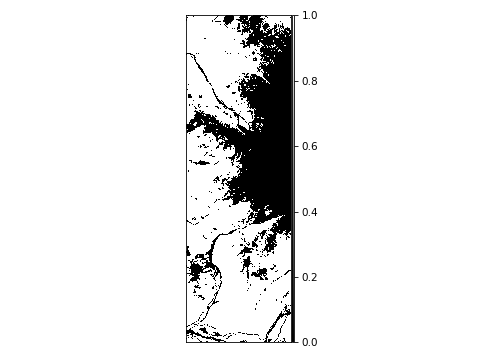

In [117]:
f,ax = plt.subplots()
pltlib.iv(forest_mask,ax=ax,cmap='gray')

In [36]:
nmad_pre_ma,nmad_post_ma = [iolib.ds_getma(x) for x in relative_ds_list[1:3]]

In [119]:
nmad_pre_stats = malib.get_stats_dict(nmad_pre_ma)

In [120]:
nmad_post_stats = malib.get_stats_dict(nmad_post_ma)

In [121]:
nmad_pre_stats

{'count': 30738232,
 'min': 9.049072104971856e-05,
 'max': 432.4452209472656,
 'ptp': 432.44512939453125,
 'mean': 5.12874724554012,
 'std': 5.263791335464185,
 'nmad': 3.1022174467563626,
 'med': 3.5935676097869873,
 'median': 3.5935676097869873,
 'p16': 1.259268879890442,
 'p84': 8.69452953338623,
 'spread': 3.7176303267478943,
 'mode': 1.2639744281768799}

In [122]:
nmad_post_stats

{'count': 31173497,
 'min': 0.00036196288419887424,
 'max': 115.90811920166016,
 'ptp': 115.90776062011719,
 'mean': 1.4909131409465939,
 'std': 2.396382779412778,
 'nmad': 0.7432550061106682,
 'med': 0.72899329662323,
 'median': 0.72899329662323,
 'p16': 0.21934951841831207,
 'p84': 2.467863082885742,
 'spread': 1.124256782233715,
 'mode': 0.17736181616783142}

{'count': 22507844, 'min': 0.0, 'max': 106.99152374267578, 'ptp': 106.99152374267578, 'mean': 1.600555645604993, 'std': 2.478914139246157, 'nmad': 0.9348377400398253, 'med': 0.8346863985061646, 'median': 0.8346863985061646, 'p16': 0.16143545508384705, 'p84': 2.7306480407714844, 'spread': 1.2846062928438187, 'mode': 0.0}


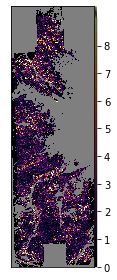

In [37]:
nmad_post_forest = np.ma.array(nmad_post_ma,mask=~forest_mask)
f,ax = plt.subplots()
pltlib.iv(nmad_post_forest,ax=ax,cmap='inferno')
nmad_post_foret_stats = malib.get_stats_dict(nmad_post_forest)
print(nmad_post_foret_stats)

{'count': 12727762, 'min': 0.0, 'max': 115.90811920166016, 'ptp': 115.90811920166016, 'mean': 0.8211906808096161, 'std': 1.8541719967955983, 'nmad': 0.39711818289756773, 'med': 0.33517763018608093, 'median': 0.33517763018608093, 'p16': 0.048503026366233826, 'p84': 1.1944775581359863, 'spread': 0.5729872658848763, 'mode': 0.0}


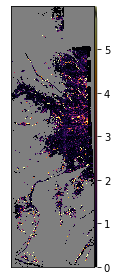

In [38]:
nmad_post_non_forest = np.ma.array(nmad_post_ma,mask=forest_mask)
f,ax = plt.subplots()
pltlib.iv(nmad_post_non_forest,ax=ax,cmap='inferno')
nmad_post_non_forest_stats = malib.get_stats_dict(nmad_post_non_forest)
print(nmad_post_non_forest_stats)

In [125]:
malib.calcperc(nmad_post_forest,(1,99))

(0.06008584052324295, 12.46998405456543)

In [126]:
malib.calcperc(nmad_post_non_forest,(1,99))

(0.018822070211172104, 8.900305328369141)

In [127]:
malib.calcperc(nmad_post_ma,(1,99))

(0.02968095801770687, 11.524173736572266)

In [128]:
malib.calcperc(nmad_pre_ma,(1,99))

(0.18351519107818604, 25.01941680908203)

{'count': 22141773, 'min': 0.0, 'max': 432.4452209472656, 'ptp': 432.4452209472656, 'mean': 5.1003723956003615, 'std': 5.75456804800034, 'nmad': 3.677636287307739, 'med': 3.275402307510376, 'median': 3.275402307510376, 'p16': 0.5429443717002869, 'p84': 9.61047649383545, 'spread': 4.533766061067581, 'mode': 0.0}


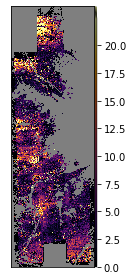

In [39]:
nmad_pre_forest = np.ma.array(nmad_pre_ma,mask=~forest_mask)
f,ax = plt.subplots()
pltlib.iv(nmad_pre_forest,ax=ax,cmap='inferno')
nmad_pre_forest_stats = malib.get_stats_dict(nmad_pre_forest)
print(nmad_pre_forest_stats)

nmad_pre_ma = iolib.fn_getma(nmad_pre_fn)

In [130]:
malib.calcperc(nmad_pre_ma,(1,99))

(0.18351519107818604, 25.01941680908203)

{'count': 12719555, 'min': 0.0, 'max': 421.8805847167969, 'ptp': 421.8805847167969, 'mean': 3.515636742317139, 'std': 3.9032998300121817, 'nmad': 2.6939637795209883, 'med': 2.8319976329803467, 'median': 2.8319976329803467, 'p16': 0.4680180251598358, 'p84': 6.059982776641846, 'spread': 2.795982375741005, 'mode': 0.0}


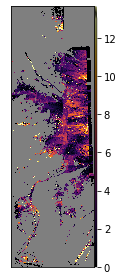

In [40]:
nmad_pre_non_forest = np.ma.array(nmad_pre_ma,mask=forest_mask)
f,ax = plt.subplots()
pltlib.iv(nmad_pre_non_forest,ax=ax,cmap='inferno')
nmad_pre_non_forest_stats = malib.get_stats_dict(nmad_pre_non_forest)
print(nmad_pre_non_forest_stats)

In [132]:
malib.calcperc(nmad_pre_forest,(1,99))

(0.21599682345986473, 26.90959243774421)

In [133]:
malib.calcperc(nmad_pre_non_forest,(1,99))

(0.1469569206237793, 16.865176296234164)

In [136]:
malib.calcperc(nmad_post_ma,(1,99))

(0.02968095801770687, 11.524173736572266)

In [134]:
malib.calcperc(nmad_post_non_forest,(1,99))

(0.018822070211172104, 8.900305328369141)

In [135]:
malib.calcperc(nmad_post_forest,(1,99))

(0.06008584052324295, 12.46998405456543)

In [41]:
slope_ma_rel = geolib.gdaldem_mem_ds(relative_ds_list[0],'slope',returnma=True)
low_slope = np.ma.masked_where(slope_ma_rel>10,slope_ma_rel)
cmask_slope_low_post_nmad = malib.common_mask([low_slope,nmad_post_ma])
low_slope_post_nmad = np.ma.array(nmad_post_ma,mask=cmask_slope_low_post_nmad)
high_slope_post_nmad = np.ma.array(nmad_post_ma,mask=~cmask_slope_low_post_nmad)

<IPython.core.display.Javascript object>


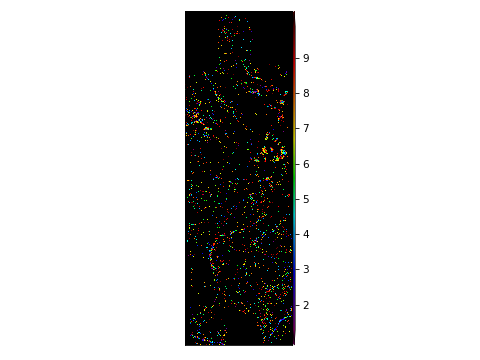

In [138]:
f,ax = plt.subplots()
pltlib.iv(low_slope,ax=ax)

In [139]:
malib.calcperc(low_slope_post_nmad,(1,99))

(0.02316562458872795, 6.769430160522461)

In [140]:
malib.calcperc(high_slope_post_nmad,(1,99))

(0.03040488436818123, 11.805419921875)

In [141]:
malib.get_stats_dict(low_slope_post_nmad)

{'count': 2211087,
 'min': 0.00036196288419887424,
 'max': 79.22679901123047,
 'ptp': 79.2264404296875,
 'mean': 0.9439994514569596,
 'std': 1.3798141332599851,
 'nmad': 0.491567963039875,
 'med': 0.5096437335014343,
 'median': 0.5096437335014343,
 'p16': 0.16288331151008606,
 'p84': 1.5571643114089966,
 'spread': 0.6971404999494553,
 'mode': 0.11510419845581055}

In [142]:
malib.get_stats_dict(high_slope_post_nmad)

{'count': 28962410,
 'min': 0.00036196288419887424,
 'max': 115.90811920166016,
 'ptp': 115.90776062011719,
 'mean': 1.5326663565440724,
 'std': 2.4517617527627396,
 'nmad': 0.7663308473467827,
 'med': 0.7507110834121704,
 'median': 0.7507110834121704,
 'p16': 0.2255028784275055,
 'p84': 2.5424273014068604,
 'spread': 1.1584622114896774,
 'mode': 0.15998759865760803}

In [42]:
slope_ma_rel = geolib.gdaldem_mem_ds(relative_ds_list[0],'slope',returnma=True)
low_slope = np.ma.masked_where(slope_ma_rel>10,slope_ma_rel)
cmask_slope_low_pre_nmad = malib.common_mask([low_slope,nmad_pre_ma])
low_slope_pre_nmad = np.ma.array(nmad_pre_ma,mask=cmask_slope_low_pre_nmad)
high_slope_pre_nmad = np.ma.array(nmad_pre_ma,mask=~cmask_slope_low_pre_nmad)

#### Plot for paper ?

In [43]:
#https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots

# order is full area, forest, not-forest, low_slope,high_slope
data_pre = [np.ma.compressed(nmad_pre_ma),np.ma.compressed(np.ma.array(nmad_pre_ma,mask=~forest_mask)),
           np.ma.compressed(np.ma.array(nmad_pre_ma,mask=forest_mask)),
           np.ma.compressed(np.ma.array(nmad_pre_ma,mask=cmask_slope_low_pre_nmad)),
           np.ma.compressed(np.ma.array(nmad_pre_ma,mask=~cmask_slope_low_pre_nmad))]
data_post = [np.ma.compressed(nmad_post_ma),np.ma.compressed(np.ma.array(nmad_post_ma,mask=~forest_mask)),
           np.ma.compressed(np.ma.array(nmad_post_ma,mask=forest_mask)),
           np.ma.compressed(np.ma.array(nmad_post_ma,mask=cmask_slope_low_post_nmad)),
           np.ma.compressed(np.ma.array(nmad_post_ma,mask=~cmask_slope_low_post_nmad))]


In [44]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

<IPython.core.display.Javascript object>


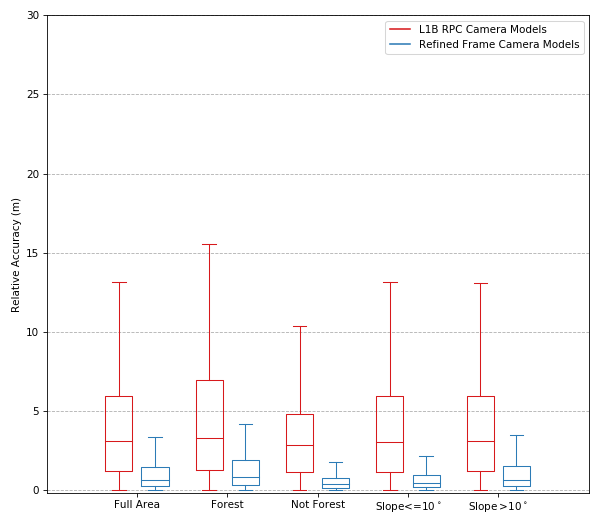

In [152]:
ticks = ['Full Area', 'Forest', 'Not Forest', 'Slope<=10$^\circ$','Slope$>\!10^\circ$']
f,ax = plt.subplots(figsize=(8,7))
box_pre = plt.boxplot(data_pre, positions=np.array(range(len(data_pre)))*2.0-0.4, sym='', widths=0.6)
box_post = plt.boxplot(data_post, positions=np.array(range(len(data_post)))*2.0+0.4, sym='', widths=0.6)
set_box_color(box_pre, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(box_post, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax.plot([], c='#D7191C', label='L1B RPC Camera Models')
ax.plot([], c='#2C7BB6', label='Refined Frame Camera Models')
ax.legend()

ax.set_xticks((np.array(range(len(data_pre)))*2.0-0.4 + np.array(range(len(data_pre)))*2.0+0.4)/2)
ax.set_xticklabels(ticks,ha='center')
ax.set_xlim(-2, len(ticks)*2)
ax.set_ylim(-0.2, 30)
ax.set_ylabel('Relative Accuracy (m)')
ax.grid(linestyle='--',axis='y')
plt.tight_layout()
#plt.savefig('/nobackup/sbhusha1/skysat_manuscript/figures/Supplemtary_x2.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

<IPython.core.display.Javascript object>


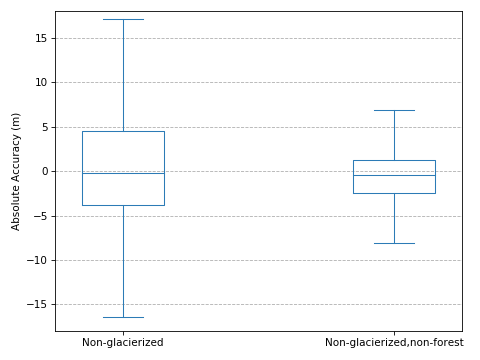

In [84]:
dh_stats = [np.ma.compressed(non_ice_dh_stats), np.ma.compressed(dem_diff_static)]
f,ax = plt.subplots()
ticks = ['Non-glacierized','Non-glacierized,non-forest']
dh_stats_plot = plt.boxplot(dh_stats, positions=np.array(range(len(dh_stats)))*2.0, sym='', widths=0.6)
set_box_color(dh_stats_plot, '#2C7BB6')
ax.set_xticklabels(ticks)
ax.set_ylim(-18,18)
ax.set_ylabel('Absolute Accuracy (m)')
ax.grid(linestyle='--',axis='y')
plt.tight_layout()


In [102]:
data_pre[4].size*2*2*1e-6

129.544164

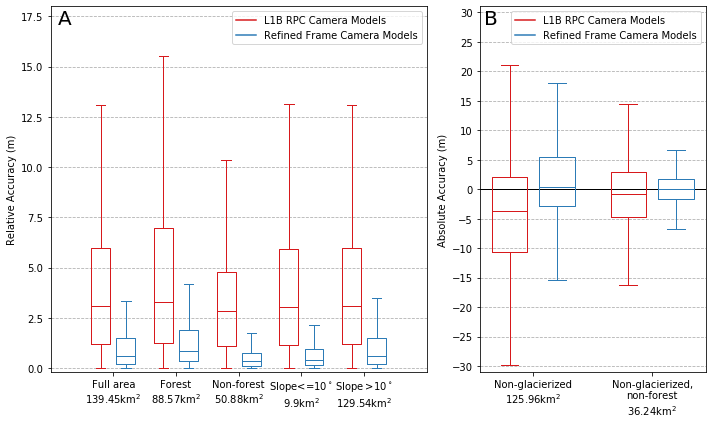

In [47]:
ticks = [f'Full area\n{np.round(data_pre[0].size*2*2*1e-6,2)}km$^2$', 
         f'Forest\n{np.round(data_pre[1].size*2*2*1e-6,2)}km$^2$', 
         f'Non-forest\n{np.round(data_pre[2].size*2*2*1e-6,2)}km$^2$',
         f'Slope<=10$^\circ$\n{np.round(data_pre[3].size*2*2*1e-6,2)}km$^2$',
         f'Slope$>\!10^\circ$\n{np.round(data_pre[4].size*2*2*1e-6,2)}km$^2$']
f,ax = plt.subplots(1,2,figsize=(10,6),gridspec_kw={'width_ratios': [2.5, 1.5]})
box_pre = ax[0].boxplot(data_pre, positions=np.array(range(len(data_pre)))*2.0-0.4, sym='', widths=0.6)
box_post = ax[0].boxplot(data_post, positions=np.array(range(len(data_post)))*2.0+0.4, sym='', widths=0.6)
set_box_color(box_pre, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(box_post, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
ax[0].plot([], c='#D7191C', label='L1B RPC Camera Models')
ax[0].plot([], c='#2C7BB6', label='Refined Frame Camera Models')
ax[0].legend()

ax[0].set_xticks((np.array(range(len(data_pre)))*2.0-0.4 + np.array(range(len(data_pre)))*2.0+0.4)/2)
ax[0].set_xticklabels(ticks,ha='center')
ax[0].set_xlim(-2, len(ticks)*2)
ax[0].set_ylim(-0.2, 18)
ax[0].set_ylabel('Relative Accuracy (m)')
ax[0].grid(linestyle='--',axis='y')
ax[1].axhline(y=0,c='k',lw=1)
rpc_dh_stats = [np.ma.compressed(non_ice_dh_stats_rpc), np.ma.compressed(dem_diff_static_rpc)] 
dh_stats = [np.ma.compressed(non_ice_dh_stats), np.ma.compressed(dem_diff_static)]
ticks = [f'Non-glacierized\n{np.round(dh_stats[0].size*2*2*1e-6,2)}km$^2$',
         f'Non-glacierized,\nnon-forest\n{np.round(dh_stats[1].size*2*2*1e-6,2)}km$^2$']
dh_stats_plot_rpc = ax[1].boxplot(rpc_dh_stats, positions=np.array(range(len(dh_stats)))*2.0-0.4, sym='', widths=0.6)
dh_stats_plot = ax[1].boxplot(dh_stats, positions=np.array(range(len(dh_stats)))*2.0+0.4, sym='', widths=0.6)
set_box_color(dh_stats_plot_rpc, '#D7191C')
set_box_color(dh_stats_plot, '#2C7BB6')
ax[1].set_xticks((np.array(range(len(rpc_dh_stats)))*2.0-0.4 + np.array(range(len(dh_stats)))*2.0+0.4)/2)
ax[1].set_xticklabels(ticks,ha='center')
ax[1].set_ylim(-31,31)

ax[1].set_yticks(np.arange(-30,31,5))
ax[1].set_ylabel('Absolute Accuracy (m)')
ax[1].grid(linestyle='--',axis='y')

ax[1].plot([], c='#D7191C', label='L1B RPC Camera Models')
ax[1].plot([], c='#2C7BB6', label='Refined Frame Camera Models')
ax[1].legend(loc='upper right')
plt.tight_layout()
import string
label_itereator = string.ascii_uppercase
for idx,axes in enumerate(ax):
    axes.text(0.02,0.95,label_itereator[idx],color='k',fontsize=20,transform=axes.transAxes)
plt.savefig('/nobackup/sbhusha1/skysat_manuscript/figures/Supplemtary_x2.jpg',
            dpi=300,bbox_inches='tight',pad_inches=0.1)

In [48]:
malib.mad(dh_stats[0]) # for non-glacier

5.8478724609374995

In [49]:
malib.mad(dh_stats[1]) # for non-glacier,not-forest

2.4890378173828123

In [50]:
np.array(range(len(data_pre)))*2.0-0.4

array([-0.4,  1.6,  3.6,  5.6,  7.6])

In [51]:
np.array(range(len(data_pre)))*2.0+0.4

array([0.4, 2.4, 4.4, 6.4, 8.4])

In [52]:
(np.array(range(len(data_pre)))*2.0-0.4 + np.array(range(len(data_pre)))*2.0+0.4)/2

array([0., 2., 4., 6., 8.])

In [46]:
np.array(range(3, len(ticks) * 2, 2))

array([3, 5, 7, 9])

In [41]:
nmad_pre_non_forest = np.ma.array(nmad_pre_ma,mask=forest_mask)
f,ax = plt.subplots()
pltlib.iv(nmad_post_ma,ax=ax,cmap='inferno')
#nmad_pre_non_forest_stats = malib.get_stats_dict(nmad_post_non_forest)
#print(nmad_pre_non_forest_stats)

<IPython.core.display.Javascript object>

In [144]:
malib.calcperc(low_slope_pre_nmad,(1,99))

(0.14985263347625732, 21.84774627685558)

In [146]:
malib.calcperc(high_slope_pre_nmad,(1,99))

(0.18677285313606262, 25.233879203796427)

In [147]:
malib.get_stats_dict(high_slope_pre_nmad)

{'count': 28535103,
 'min': 0.00018098144209943712,
 'max': 431.6593933105469,
 'ptp': 431.6592102050781,
 'mean': 5.152181988869094,
 'std': 5.3129548084146645,
 'nmad': 3.1018148337364195,
 'med': 3.6015307903289795,
 'median': 3.6015307903289795,
 'p16': 1.266327142715454,
 'p84': 8.724029541015625,
 'spread': 3.7288511991500854,
 'mode': 1.2639744281768799}

In [149]:
malib.get_stats_dict(low_slope_pre_nmad)

{'count': 2203129,
 'min': 9.049072104971856e-05,
 'max': 432.4452209472656,
 'ptp': 432.44512939453125,
 'mean': 4.825218575784039,
 'std': 4.5687317626712645,
 'nmad': 3.0996685069084164,
 'med': 3.4909510612487793,
 'median': 3.4909510612487793,
 'p16': 1.1714929342269897,
 'p84': 8.397900581359863,
 'spread': 3.6132038235664368,
 'mode': 0.862195611000061}

<IPython.core.display.Javascript object>


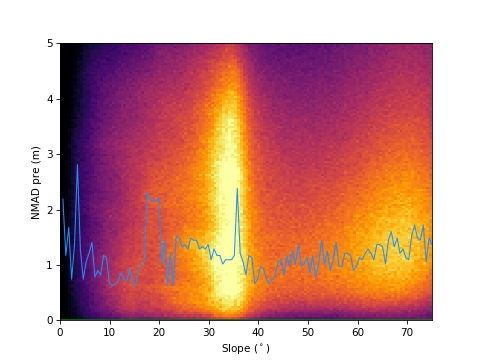

Text(0, 0.5, 'NMAD pre (m)')

In [111]:
cmask_slope_pre = malib.common_mask([lidar_slope_ma_rel,nmad_pre_ma])
f,ax = plt.subplots()
ax.axhline(y=0,c='g')
pltlib.plot_2dhist(ax,np.ma.compressed(np.ma.array(lidar_slope_ma_rel,mask=cmask_slope_pre)),
                   np.ma.compressed(np.ma.array(nmad_pre_ma,mask=cmask_slope_pre)),
                  ylim=(0,5),xlim=(0,75))
ax.set_xlabel("Slope ($^\circ$)")
ax.set_ylabel("NMAD pre (m)")

